In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import datetime
from scipy import stats
%matplotlib inline

In [2]:
df_2016 = pd.read_csv('../2016_df.csv', parse_dates='Created_Date')
df_2015 = pd.read_csv('../2015_df.csv', parse_dates='Created_Date')
df_2014 = pd.read_csv('../2014_df.csv', parse_dates='Created_Date')

In [22]:
df_2014['day'] = df_2014.index
df_2015['day'] = df_2015.index
df_2016['day'] = df_2016.index

In [23]:
df_2014 = df_2014.set_index('Created_Date')
df_2015 = df_2015.set_index('Created_Date')
#df_2016 = df_2016.set_index('Created_Date')
df_2016 = df_2016[df_2016['Created_Date'] != '2016-02-29']

In [24]:
df_2016 = df_2016.replace(to_replace="-", value=0)

In [25]:
train_years = pd.concat([df_2014, df_2015])

In [26]:
df_weather = pd.get_dummies(train_years['Weather'])

In [27]:
train_years = pd.concat([train_years, df_weather],axis=1,join='inner')

In [28]:
train_years.drop('Weather', axis=1, inplace=True)

In [29]:
complaint_type = ['Building_Conditions', 'General_Request', 
                 'Living_Conditions', 'Parking_Enforcement', 
                 'Signal_Sign_Repair', 'Street_Sidewalk_Repair']

weather_types = ['Street_Sidewalk_Repair', 'Max_TempF', 'Fog', 'Fog-Rain', 'Fog-Rain-Snow', 
                 'Fog-Rain-Thunderstorm', 'Fog-Snow',
                 'Rain', 'Rain-Snow',
                 'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm',
                 'Snow', 'Sunny']

feature_cols = ['General_Request', 
                'Living_Conditions', 'Parking_Enforcement', 
                'Signal_Sign_Repair', 'Street_Sidewalk_Repair',
                'Max_TempF', 'day',
                'Fog', 'Fog-Rain',
                'Fog-Rain-Snow', 
                'Fog-Rain-Thunderstorm', 'Fog-Snow',
                'Rain', 'Rain-Snow',
                'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm',
                'Snow', 'Sunny']

X = train_years[weather_types]
y = train_years['Street_Sidewalk_Repair']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [31]:
y_test_2016 = df_2016.Max_TempF

In [32]:
clf = LogisticRegression()

In [33]:
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
clf.predict(X)

array([  507.,   662.,  1016.,  1279.,  1244.,   806.,  1226.,  1226.,
        1279.,  1098.,   499.,   999.,  1043.,  1225.,  1304.,  1304.,
        1043.,   635.,   507.,   662.,   783.,   783.,  1226.,  1226.,
         441.,   783.,  1043.,   783.,   783.,  1226.,   955.,   651.,
         878.,   806.,  1279.,  1098.,  2829.,  2276.,  1226.,  1016.,
        1226.,  1226.,  1226.,   614.,  1098.,   806.,  1226.,  1226.,
         783.,  2184.,  1902.,  2184.,  1043.,  1043.,  1184.,  1381.,
         783.,   783.,  1226.,  1043.,  1098.,   783.,  1279.,  1043.,
        1043.,  1144.,   999.,   806.,  1098.,   999.,  1225.,  1043.,
        1043.,   806.,   955.,   783.,  1043.,  1225.,  1225.,  1043.,
         999.,   999.,  1043.,   783.,   783.,  1043.,   806.,   499.,
         944.,  1098.,  1043.,  1225.,  1225.,  1184.,  1225.,   651.,
        1225.,   944.,   999.,   999.,  1225.,   999.,   999.,  1304.,
         806.,  1098.,  1043.,   999.,   651.,   651.,   999.,  1225.,
      

In [35]:
df_pred = pd.DataFrame({'pred':clf.predict(X_test),'actual':y_test})

In [36]:
df_pred.sort_index(axis=0, inplace=True)

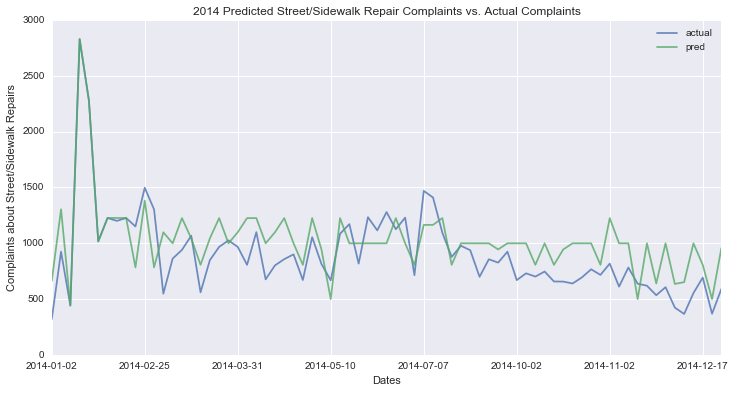

In [37]:
df_pred[pd.to_datetime(df_pred.index).year==2014].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('2014 Predicted Street/Sidewalk Repair Complaints vs. Actual Complaints')
plt.xlabel('Dates')
plt.ylabel('Complaints about Street/Sidewalk Repairs')
plt.savefig('2014_complaint_predict_street.pdf', format='pdf')

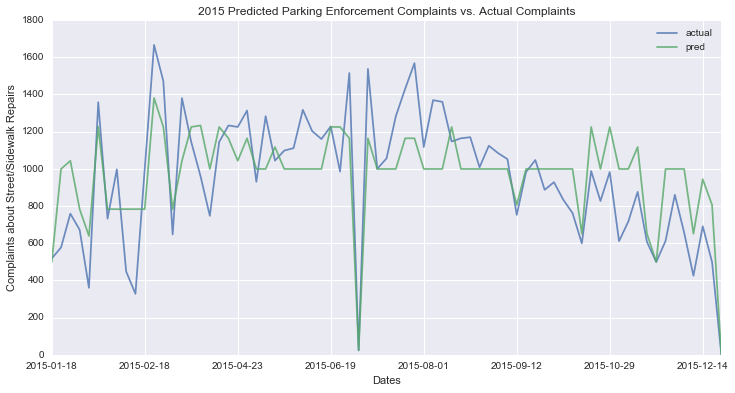

In [38]:
df_pred[pd.to_datetime(df_pred.index).year==2015].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('2015 Predicted Parking Enforcement Complaints vs. Actual Complaints')
plt.xlabel('Dates')
plt.ylabel('Complaints about Street/Sidewalk Repairs')
plt.savefig('2015_complaint_predict_street.pdf', format='pdf')